In [1]:
import os
os.chdir('../../')

In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn
from math import radians, sin, cos, sqrt, asin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2024-04-05 19:04:23.994109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from data_pipeline import Pipeline

In [4]:
df = pd.read_csv('data/CreditCardFraudFourYears.csv')

In [5]:
pipeline = Pipeline()
transformed_df = pipeline.transform(df)

In [7]:
split_idx = int(len(transformed_df) * 0.8)

split_date = transformed_df.index[split_idx]
print(str(split_date))

2021-12-31 00:00:00


In [8]:
from sklearn.preprocessing import MinMaxScaler

train = transformed_df.loc[transformed_df.index <= split_date]
test = transformed_df.loc[transformed_df.index > split_date]

target = 'total_daily_transactions'
features = [col for col in transformed_df.columns if col != target]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_reshaped = X_train_reshaped.astype('float32')
X_test_reshaped = X_test_reshaped.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1))

test_scaled = scaler.transform(test_series.values.reshape(-1, 1))
print(test_scaled)

X_train, y_train = create_dataset(train_scaled, n_input)
X_test, y_test = create_dataset(test_scaled, n_input)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

[[0.06578626]
 [0.00820652]
 [0.23083114]
 [0.23103844]
 [0.27850941]
 [0.38180421]
 [0.46374744]
 [0.40357038]
 [0.22240513]
 [0.2480002 ]
 [0.22847771]
 [1.01541313]]


In [9]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               52800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 52901 (206.64 KB)
Trainable params: 52901 (206.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(X_train_reshaped, y_train, epochs=400, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=0)

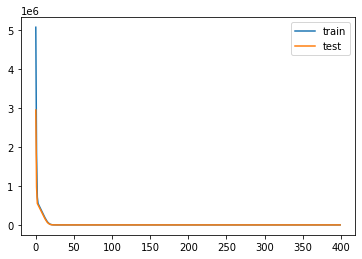

12/12 [==============================] - 0s 2ms/step


In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

predicted_transactions = model.predict(X_test_reshaped)

predicted_transactions = predicted_transactions.flatten()

                 Date  Actual_Transactions  Predicted_Transactions
trans_date                                                        
2022-01-01 2022-01-01               2031.0             2031.495483
2022-01-02 2022-01-02               2023.0             2023.406616
2022-01-03 2022-01-03                986.0              986.429138
2022-01-04 2022-01-04                962.0              962.388916
2022-01-05 2022-01-05               1145.0             1145.436768
...               ...                  ...                     ...
2022-12-27 2022-12-27               2830.0             2830.496094
2022-12-28 2022-12-28               3153.0             3153.559082
2022-12-29 2022-12-29               3093.0             3093.522949
2022-12-30 2022-12-30               4701.0             4701.578613
2022-12-31 2022-12-31               5647.0             5647.658203

[365 rows x 3 columns]


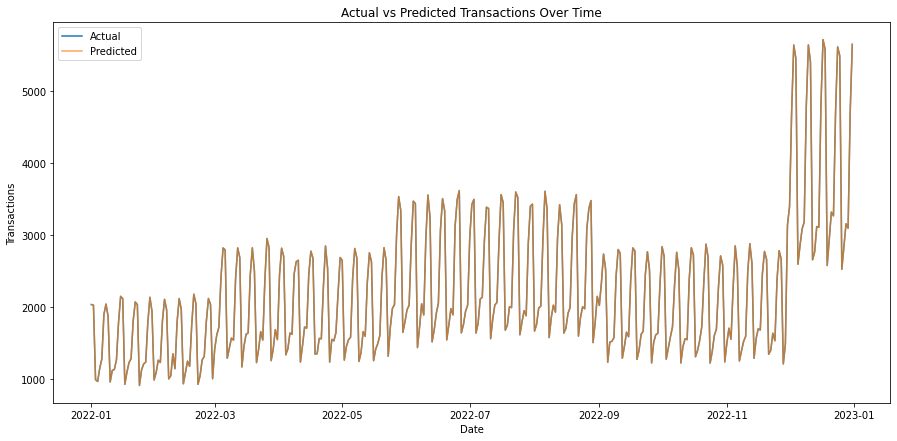

In [14]:

predicted_transactions = predicted_transactions.flatten()

assert len(predicted_transactions) == len(y_test)

results_df = pd.DataFrame({
    'Date': test.index,  # Assuming the index of `test` DataFrame has the dates
    'Actual_Transactions': y_test,
    'Predicted_Transactions': predicted_transactions
})

results_df['Date'] = pd.to_datetime(results_df['Date'])
results_df.to_csv('p3dm.csv')

print(results_df)

plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'].values, results_df['Actual_Transactions'].values, label='Actual')
plt.plot(results_df['Date'].values, results_df['Predicted_Transactions'].values, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.show()
